# Decision Trees and Random Forests

## Part 1: Introduction to Decision Trees

- https://www.youtube.com/watch?v=_L39rN6gz7Y
- https://www.ibm.com/topics/decision-trees
- https://www.geeksforgeeks.org/decision-tree/

### Theory

#### 1. What is a Decision Tree?
A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It is a tree-like model where each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (in classification) or a continuous value (in regression).

#### 2. How Decision Trees Work
The fundamental idea behind decision trees is to split the dataset into subsets based on the value of input features, with the goal of maximizing the separation of classes (in classification) or minimizing prediction error (in regression).

#### 3. Goal of Minimizing Entropy in Decision Trees
##### 3.1. Entropy and Information Gain

- **Entropy** is a measure of impurity or randomness in the data. In the context of decision trees, we want to partition the data in such a way that the resulting subsets are as pure as possible (i.e., they contain instances of only one class or are as homogeneous as possible).
- **Information Gain** quantifies the reduction in entropy achieved by splitting the dataset based on a particular attribute. It is calculated as the difference between the entropy of the dataset before the split and the weighted sum of the entropies of the subsets after the split.

##### 3.2. Minimizing Entropy

- When building a decision tree, we aim to select the attribute that provides the highest information gain, which effectively means selecting the attribute that results in the greatest reduction in entropy.
- By iteratively selecting attributes that minimize entropy, the decision tree algorithm creates partitions that are increasingly pure, leading to better classification performance.



- **Entropy and Information Gain**
  - **Entropy** measures the amount of uncertainty or impurity in a dataset. For a binary classification, the entropy $H$ of a set $S$ with $p$ positive examples and $n$ negative examples is given by:
    
    $
    H(S) = -p \log_2(p) - n \log_2(n)
    $
    
  - **Information Gain** measures the reduction in entropy or impurity achieved by partitioning the set $S$ into subsets based on an attribute $A$. The information gain $IG$ of an attribute $A$ is:
    
    $
    IG(S, A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} H(S_v)
    $
    
    where $S_v$ is the subset of $S$ for which attribute $A$ has value $v$.

- **Gini Impurity**
  - **Gini Impurity** is another measure of impurity or uncertainty used by the CART (Classification and Regression Tree) algorithm. The Gini impurity $G$ of a set $S$ with $p$ positive examples and $n$ negative examples is:
    
    $
    G(S) = 1 - (p^2 + n^2)
    $

#### 4. Advantages and Disadvantages
- **Advantages**:
  - **Interpretability**: Decision trees are easy to understand and interpret. The decision rules can be easily visualized.
  - **Non-linearity**: Decision trees can capture non-linear relationships between features.
  - **Feature Importance**: They can measure the importance of different features in the prediction task.
  
- **Disadvantages**:
  - **Overfitting**: Decision trees can easily overfit the training data, especially if they are deep.
  - **Instability**: Small variations in the data can lead to completely different trees.

#### 5. Example Calculation: Entropy and Information Gain

Consider a dataset with the following distribution of classes:

| Feature | Class |
|---------|-------|
| Sunny   | Yes   |
| Sunny   | Yes   |
| Rainy   | No    |
| Sunny   | Yes   |
| Rainy   | No    |

- **Entropy of the entire dataset \( S \)**:
  - Total instances: 5
  - Positive instances (Yes): 3
  - Negative instances (No): 2
  
  $
  H(S) = -\left(\frac{3}{5}\right) \log_2\left(\frac{3}{5}\right) - \left(\frac{2}{5}\right) \log_2\left(\frac{2}{5}\right)
  = -0.6 \log_2(0.6) - 0.4 \log_2(0.4) \approx 0.971
  $

- **Information Gain for the feature "Weather"**:
  - Split the dataset based on "Weather":
    - For "Sunny": 3 instances, all "Yes"
    - For "Rainy": 2 instances, all "No"
  - Entropy for "Sunny" subset:
  - 
    $
    H(S_{\text{Sunny}}) = -\left(\frac{3}{3}\right) \log_2\left(\frac{3}{3}\right) = 0
    $

  - Entropy for "Rainy" subset:
  - 
    $
    H(S_{\text{Rainy}}) = -\left(\frac{2}{2}\right) \log_2\left(\frac{2}{2}\right) = 0
    $

  - Weighted average entropy after the split:
  - 
    $
    H(S, \text{Weather}) = \left(\frac{3}{5}\right) H(S_{\text{Sunny}}) + \left(\frac{2}{5}\right) H(S_{\text{Rainy}}) = 0
    $

  - Information Gain:
  - 
    $
    IG(S, \text{Weather}) = H(S) - H(S, \text{Weather}) = 0.971 - 0 = 0.971
    $

This example shows how information gain helps in selecting the best feature for splitting the data.

### Practice

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

print(X.shape)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print(X_train.shape, X_test.shape)

In [ ]:
# Create and train the Decision Tree model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
# Predict and evaluate
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

In [ ]:
# Plot the Decision Tree
plt.figure(figsize=(20,20))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

### Visualise the decision boundaries of the tree
But for this, let's only use the first two features from the dataset, so we can plot the dataset.

In [ ]:
# Load the dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for easy visualization
y = iris.target

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
# Create and train the Decision Tree model
clf = DecisionTreeClassifier(max_depth=20)
clf = clf.fit(X_train, y_train)

In [ ]:
# Predict and evaluate
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

In [ ]:
# Plot the Decision Tree
plt.figure(figsize=(20,20))
plot_tree(clf, feature_names=iris.feature_names[:2], class_names=iris.target_names, filled=True)
plt.show()

In [ ]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict classes for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Decision Tree Decision Boundaries')
plt.show()

## Part 2: Introduction to Random Forests

### Theory
- https://www.youtube.com/watch?v=v6VJ2RO66Ag
- https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/

#### 1. What is a Random Forest?
A Random Forest is an ensemble learning method that combines multiple decision trees to produce a more robust and accurate model. It is used for both classification and regression tasks. The main idea is to aggregate the predictions of many individual decision trees to reduce overfitting and improve generalization.

#### 2. How Random Forests Work
- **Bootstrapping**: Random forests use a technique called bootstrapping to create multiple subsets of the training data. Each decision tree in the forest is trained on a different bootstrap sample, which is created by randomly sampling the training data with replacement.
- **Feature Randomness**: When splitting a node, each tree in a random forest considers a random subset of the features, adding further diversity among the trees.
- **Aggregation**: The final prediction of the random forest is obtained by aggregating the predictions of all individual trees (e.g., by majority vote for classification or averaging for regression).

#### 3. Advantages and Disadvantages
- **Advantages**:
  - **Robustness**: Random forests are less prone to overfitting compared to individual decision trees due to the ensemble approach.
  - **Higher Accuracy**: They often achieve higher accuracy by reducing the variance of the model.
  - **Feature Importance**: Random forests can provide estimates of feature importance.

- **Disadvantages**:
  - **Less Interpretability**: While individual decision trees are interpretable, random forests, being an ensemble of many trees, are less interpretable.
  - **Computationally Intensive**: Training and predicting with random forests can be computationally intensive, especially with a large number of trees.

### Practice

In [24]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

In [19]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [20]:
# Create and train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)

In [21]:
# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')

Random Forest Accuracy: 0.99


In [25]:
# Feature importances
feature_importances = rf_clf.feature_importances_
features = iris.feature_names
feature_importances_df = pd.DataFrame({'feature': features, 'importance': feature_importances})

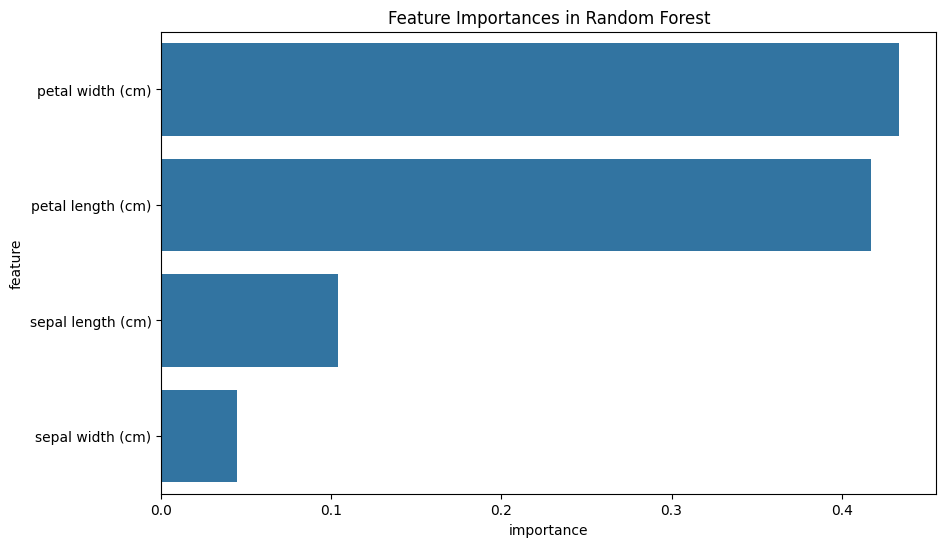

In [7]:
# Sort and plot
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_df)
plt.title('Feature Importances in Random Forest')
plt.show()